In [1]:
import warnings
import pertpy as pt
import scanpy as sc
import blitzgsea as blitz

# 忽略警告信息
warnings.filterwarnings("ignore")

In [2]:
adata = sc.read_h5ad("results/anndata_annotation_harmony_celltypist.h5ad")

adata=adata.raw.to_adata()

In [3]:
import os
os.environ["http_proxy"] = ""
os.environ["https_proxy"] = ""

# 获取 chEMBL 元数据并进行注释
pt_chembl = pt.md.Drug()
pt_chembl

In [4]:
pt_chembl.annotate(adata, source="dgidb")

AnnData object with n_obs × n_vars = 64354 × 17065
    obs: 'C0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_antibody', 'nFeature_antibody', 'patients', 'sampletag', 'organs', 'percent.mt', 'percent.ribo', 'log10GenesPerUMI', 'batch', 'integrated_snn_res.0.5', 'seurat_clusters', 'samples', 'doublet.score', 'predicted.doublet', 'cluster', 'doublet', 'patients_organ', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_1', 'leiden_2', 'celltypist_cell_label_fine

In [5]:
# 提取非空的化合物信息
non_empty_compounds = adata.var["compounds"][adata.var["compounds"] != ""]
non_empty_compounds

A2M        COBALT|Enzymes|PROSTAGLANDIN E1|TECHNETIUM TC ...
AANAT      ANTIDEPRESSANT|FLUOXETINE|GLUCOCORTICOID|ISOPR...
ABAT                  VALPROIC ACID|VIGABATRIN|valproic acid
ABCA1      CSA|PROBUCOL|atorvastatin|clopidogrel|daunorub...
ABCA3                                               imatinib
                                 ...                        
ZNF697                 interferon beta-1a|interferon beta-1b
ZNF804A                               antipsychotics|opioids
ZNF816     Tumor necrosis factor alpha (TNF-alpha) inhibi...
ZRSR2                                               H3B-8800
ZSCAN25                                 lopinavir|tacrolimus
Name: compounds, Length: 3216, dtype: object

In [6]:
pt_chembl.dgidb.dictionary

{'(+)-3-DEOXYTHYSANONE': ['TOP2A'],
 '(+)-7,9-DEOXYTHYSANONE': ['TOP2A'],
 '(+)-9-DEMETHOXYELEUTHERIN': ['TOP2A'],
 '(+)-9-DEMETHYLELEUTHERIN': ['TOP2A'],
 '(+)-ALPHA-TOCOPHERYL SUCCINATE': ['USP1'],
 '(+)-CATECHIN HYDRATE': ['ALPL', 'KDM4E'],
 '(+)-CIS-DIOXOLANE IODIDE': ['KDM4E', 'SLC5A7', 'EHMT2'],
 '(+)-ELEUTHERIN': ['TOP2A'],
 '(+)-EPITAXIFOLIN': ['NFKB1', 'ALOX15', 'CYP3A4', 'HSD17B10'],
 '(+)-HYDRASTINE': ['CYP3A4'],
 '(+)-ISOBICYCLOGERMACRENAL': ['MAPK1', 'MAPK3'],
 '(+)-ISOZONARONE': ['DHRS9'],
 '(+)-JQ1': ['BROMODOMAIN-CONTAINING PROTEIN 4',
  'BROMODOMAIN AND EXTRATERMINAL DOMAIN PROTEIN',
  'BROMODOMAIN TESTIS-SPECIFIC PROTEIN'],
 '(+)-NEO-OLIVIL': ['SHBG'],
 '(+)-TAXIFOLIN': ['KDM4E', 'POLB', 'POLI', 'EHMT2'],
 '(+)-TETRAHYDROBERBERINE': ['CYP3A4', 'CYP2D6', 'CYP1A2', 'CYP2C19'],
 '(+)-THALIPORPHINE': ['MAPT', 'TP53', 'CYP3A4', 'HSD17B10', 'THRB'],
 '(+)-TUBERIFERIN': ['RELA', 'NFKBIA'],
 '(+)-VENTILOQUINONE': ['TOP2A'],
 '(+)-VENTILOQUINONE L METHYL ETHER': ['TOP2A'],
 '(

In [7]:
# 基因集评分
pt_enricher = pt.tl.Enrichment()
pt_enricher.score(adata,
                  targets=pt_chembl.dgidb.dictionary,
                  )

In [8]:
pt_chembl.dgidb.data

,gene_claim_name,gene_concept_id,gene_name,interaction_source_db_name,interaction_source_db_version,interaction_type,interaction_score,drug_claim_name,drug_concept_id,drug_name,approved,immunotherapy,anti_neoplastic
0,CYP2D6,hgnc:2625,CYP2D6,DTC,9/2/20,NaN,0.017709,RACLOPRIDE,ncit:C152139,RACLOPRIDE,False,False,False
1,PPARG,hgnc:9236,PPARG,DTC,9/2/20,NaN,0.840123,KALOPANAX-SAPONIN F,chembl:CHEMBL1833984,CHEMBL:CHEMBL1833984,False,False,False
2,ATAD5,hgnc:25752,ATAD5,DTC,9/2/20,NaN,0.177992,RO-5-3335,chembl:CHEMBL91609,CHEMBL:CHEMBL91609,False,False,False
3,RGS4,hgnc:10000,RGS4,DTC,9/2/20,NaN,0.034319,"3,4-DICHLOROISOCOUMARIN",drugbank:DB04459,"3,4-DICHLOROISOCOUMARIN",False,False,False
4,MAPK1,hgnc:6871,MAPK1,DTC,9/2/20,NaN,0.050007,WITHAFERIN A,iuphar.ligand:13097,WITHAFERIN A,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98234,TP53,hgnc:11998,TP53,JAX-CKB,10-Apr-24,NaN,0.014489,PD-0325901,ncit:C52195,MIRDAMETINIB,False,False,True
98235,TP53,hgnc:11998,TP53,JAX-CKB,10-Apr-24,NaN,0.115911,ALRN-6924,ncit:C118669,SULANEMADLIN,False,False,False
98236,TP53,hgnc:11998,TP53,JAX-CKB,10-Apr-24,NaN,0.025758,LY3009120,iuphar.ligand:8943,LY3009120,False,False,False
98237,TP53,hgnc:11998,TP53,JAX-CKB,10-Apr-24,NaN,0.010537,Cabozantinib,rxcui:1363267,CABOZANTINIB S-MALATE,True,False,True


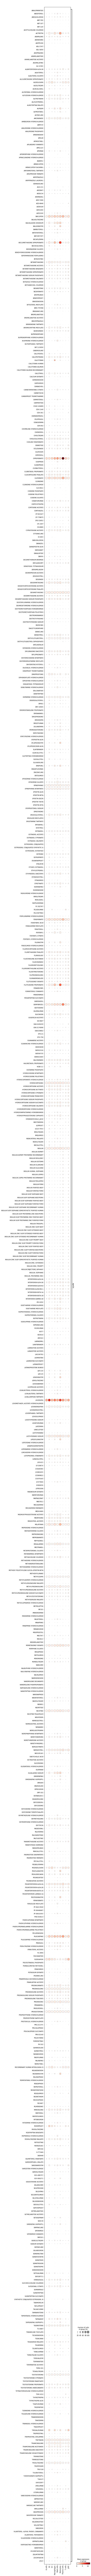

In [9]:
# 使用 Wilcoxon 检验计算差异表达基因

# 绘制点图，根据 ATC 类别
pt_enricher.plot_dotplot(
    adata,
    source="dgidb",
    category_name="interaction_type",
    categories=["agonist"],
    groupby="celltypist",
)

In [10]:
# 超几何检验，测试显著性
sc.tl.rank_genes_groups(adata, method="wilcoxon", groupby="celltypist")

overrepresentation = pt_enricher.hypergeometric(adata, pt_chembl.dgidb.dictionary)

In [11]:
overrepresentation["pDC"]

,intersection,gene_group,markers,universe,pvals,pvals_adj
DORLIMOMAB ARITOX,28,78,837,17065,1.645976e-17,6.370005e-14
CYCLOHEXIMIDE,30,91,837,17065,1.818353e-17,6.370005e-14
ELX-02,28,78,837,17065,1.645976e-17,6.370005e-14
MT-3724,28,79,837,17065,2.432785e-17,6.370005e-14
ATALUREN,28,79,837,17065,2.432785e-17,6.370005e-14
...,...,...,...,...,...,...
(-)-OLEOCANTHAL,0,1,837,17065,1.000000e+00,1.000000e+00
zoledronate,0,8,837,17065,1.000000e+00,1.000000e+00
zolpidem,0,2,837,17065,1.000000e+00,1.000000e+00
zonisamide,1,3,837,17065,1.400520e-01,1.000000e+00


In [ ]:

# 进行基因集富集分析（GSEA）
enrichment = pt_enricher.gsea(adata)


In [ ]:

# 绘制 GSEA 结果
pt_enricher.plot_gsea(adata, enrichment, interactive_plot=True)


In [ ]:

# 使用自定义基因集进行评分
targets = blitz.enrichr.get_library("GO_Molecular_Function_2021")
pt_enricher.score(adata, targets=targets)
enrichment = pt_enricher.gsea(adata, targets=targets)

# 绘制自定义基因集的运行和弦图
fig = blitz.plot.running_sum(
    signature=adata.uns["pertpy_enrichment_gsea"]["scores"]["B cells"],
    library=adata.uns["pertpy_enrichment_gsea"]["targets"],
    result=enrichment["B cells"],
    geneset="MHC class II receptor activity (GO:0032395)",
    interactive_plot=True,
)
fig.show()

# 结论
# 使用 pertpy 的元数据进行基因集富集分析，以识别不同细胞群中受生物活性分子影响的重要基因集。